<a href="https://colab.research.google.com/github/endyjams/HistogramMatching/blob/main/histogram_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage.data import eagle

In [ ]:
# Matching de histograma é uma técnica usada em processamento de imagens para:
# Fazer com que o histograma imagem entrada estabeleça sua distribuição de frequência
# De forma convergente ao histograma da imagem de referência
# Isso é útil para que consigamos fazer com que certas imagens sigam um padrão de distribuição estabelecido pela referência
# Além de que a equalização de um histograma nem sempre irá levar ao resultado desejado

In [ ]:
# Agora iremos performar o matching de histograma em uma imagem de entrada
# Sendo o histograma de referência adotado pelo professor na atividade.

Seja $p_r(r)$ a PDF da imagem de entrada, então a nossa funçaõ de transformação será dada por:

\begin{align}
        s = T(r) = &\int_0^{r} p_r(w) \mathrm{d}w \  \\[1em]
    \end{align}

No entanto, essa função é equivalente a CDF, Função de distribuição acumulativa, e pode ser representada por:

\begin{align}
        \text T(r_k) = \left(\sum_{j=1}^k p_r(r_j)\right) \\[1em]
    \end{align}
    
para todo k presente no intervalo (1...L) correspondentes aos níveis de intensidade da imagem

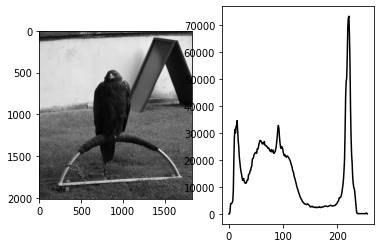

In [ ]:
# Definição da imagem de entrada

input_img = eagle()

# Histograma da imagem de entrada antes de performar a equalização:

_,ax = plt.subplots (1,2)
ax[0].imshow (input_img,cmap='gray',vmin=0,vmax=255)
h = np.histogram (input_img,bins=256,range=(0,256))
ax[1].plot (h[0],'-k')
#
#
#
#


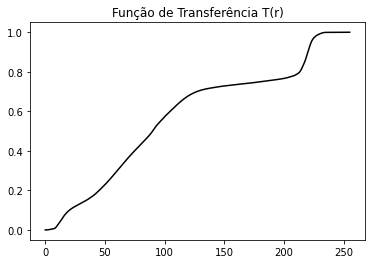

In [ ]:
# Definição das linhas, colunas e dimensão total da imagem de entrada

input_img_lines, input_img_columns = input_img.shape
input_img_dimension = input_img_lines*input_img_columns

# Cálculo da CDF, e aplicação da função de tranferência
pr = np.histogram (input_img,bins=256,range=(0,256))[0] / input_img_dimension
T = np.cumsum(pr)

equalized_input_img_histogram = np.zeros_like(input_img).astype('float')

# Aplicação da CDF na imagem
for i in range (input_img_lines):
  for j in range (input_img_columns):
    equalized_input_img_histogram[i,j] = T[input_img[i,j]]

equalized_input_img_histogram = (equalized_input_img_histogram*255).astype('uint8')

plt.title('Função de Transferência T(r)')
plt.plot(T,'-k')

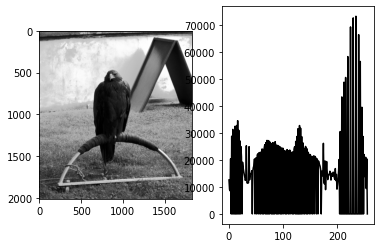

In [ ]:
# Resultado da equalização do histograma da imagem de entrada:

_,ax = plt.subplots (1,2)
ax[0].imshow (equalized_input_img_histogram,cmap='gray',vmin=0,vmax=255)
h = np.histogram (equalized_input_img_histogram,bins=256,range=(0,256))
ax[1].plot (h[0],'-k')

Sejam $p_r(r)$ a PDF da imagem de entrada, e $p_z(z)$ a PDF da imagem de saída, teremos a seguinte definição de propriedade (tendo r e z definindo os níveis de intensidade das imagens:

\begin{align}
        H(z) = &\int_0^{z} p_z(w) \mathrm{d}w \  = T(r)\\[1em]
    \end{align}

sendo $p_r(r)$ a função de transformação já definida:

\begin{align}
        s = T(r) = &\int_0^{r} p_r(w) \mathrm{d}w \  \\[1em]
    \end{align}

Então, a partir disso, teremos que:
\begin{align}
        z = H⁻¹(s) = H⁻¹[T(r)]
    \end{align}

In [ ]:
# Matching de Histograma
# Primeiro precisamos estabelecer o histograma referência
# Dessa forma, poderemos fazer o mapeamento

Logo, teremos que nosso histograma será dado por uma função cuja a integral no intervalo tenha valor(área) igual a 1:
\begin{align}
        s = H(z) = z³
    \end{align}
    
\begin{align}
        z = H⁻¹(s) = \frac{3s²}3
    \end{align}

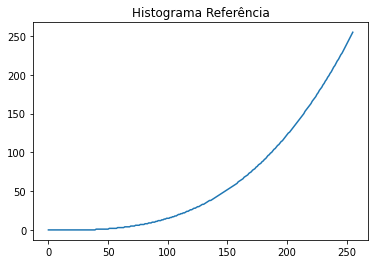

In [ ]:
# Histograma da função referência para realizar o matching de histograma

s = np.linspace(0,1,256)
ref_histogram = (3*(np.power(s,2)))/3 # Fórmula da inversa de H no histograma referência 
ref_histogram = np.cumsum(ref_histogram) # CDF do histograma referência

ref_histogram = ref_histogram - ref_histogram.min() # Garante que o valor mínimo na matriz será 0
ref_histogram = ref_histogram / ref_histogram.max() # Garante que o valor máximo é 1 range se estabelece entre (0,1) 
ref_histogram = (255*ref_histogram).astype('uint8') # Multiplicar por 255 e realizar o parse para um inteiro de 8 bits estabelencendo uma abordagem de (0,255) novamente
plt.title('Histograma Referência')
plt.plot(ref_histogram)

In [ ]:
# Realizar o matching do histograma
# A partir do histograma da imagem equalizada e o histograma referência
# Aplicando o mapeamento do histograma referência no histograma equalizado
# O mapeamento é feito com a inversa de H estabelecida acima

output_img_histogram = np.zeros_like(equalized_input_img_histogram).astype('float')
output_img_lines, output_img_columns = output_img_histogram.shape
output_img_dimension = output_img_lines*output_img_columns

# Mapeando a inversa de H no histograma final
for i in range (output_img_lines):
  for j in range (output_img_columns):
    output_img_histogram[i,j] = ref_histogram[equalized_input_img_histogram[i,j]]
    
output_img_histogram = (output_img_histogram*255).astype ('uint8')

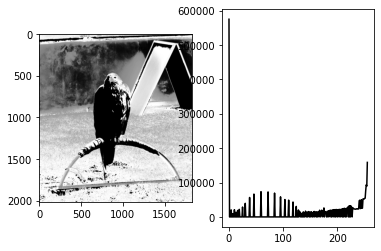

In [ ]:
_,ax = plt.subplots (1,2)
ax[0].imshow (output_img_histogram,cmap='gray',vmin=0,vmax=255)
h = np.histogram (output_img_histogram,bins=256,range=(0,256))
ax[1].plot (h[0],'-k')
#


In [ ]:
#